In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score,train_test_split
#数据集路径
data_path = 'sonar.all-data'
#读入数据集
df= pd.read_table(data_path,sep = ',+',header=None, engine='python')
#打印数据集标签统计数据
#数据第一列为数据的标签
print("lable")
print(df[60].value_counts())

#y为标签列
y = df[60]
#print(y)
#X为去掉标签列的数据
X = df.drop([60], axis=1)
#print(X)
print("X.shape", X.shape)
print("y.shape", y.shape)

#利用train_test_split方法，将X,y随机划分为训练集（train_data），训练集标签（train_labels），
#测试集（test_data），试集标签（test_labels），按训练集：测试集=1:9的概率划分
train_features,test_features, train_labels,test_labels= train_test_split(X, y, test_size=0.1, random_state=42)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)
print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

lable
M    111
R     97
Name: 60, dtype: int64
X.shape (208, 60)
y.shape (208,)
train_features (187, 60)
train_labels (187,)
test_features (21, 60)
test_labels (21,)


In [2]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1,save_name):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')

    plt.legend(fontsize='small',labels=[ 'R','M'])  
    plt.savefig(save_name)
    plt.show()

**********************GaussianNB**********************
Training time cost 0.0019948482513427734 s
Test time cost 0.0009975433349609375 s
GaussianNB accuracy= 0.8095238095238095


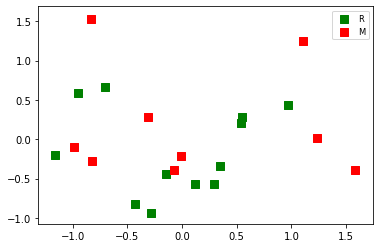

In [3]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import time
from sklearn import  decomposition
#高斯贝叶斯分类器
print('**********************GaussianNB**********************')
time_start = time.time()
# 创建分类器对象
clf = GaussianNB()
#用训练数据拟合分类器模型
clf = clf.fit(train_features.astype(np.float64), train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')

time_start = time.time()
#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features.astype(np.float64))
time_end = time.time()
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('Test time cost',time_end-time_start,'s')
print('GaussianNB accuracy=', accuracy)

#提取主成分进行分析画图
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 'R'],X_pca[label_predict == 'M'],"GaussianNB-matplotlib-sonar.png")

**********************MultinomialNB**********************
Training time cost 0.05487847328186035 s
Test time cost 0.0009982585906982422 s
MultinomialNB accuracy= 0.6666666666666666


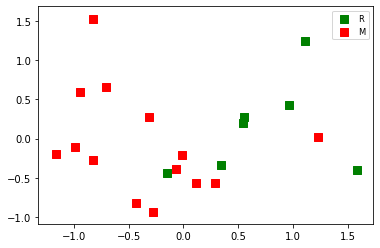

In [5]:
#多项式贝叶斯分类器
print('**********************MultinomialNB**********************')
time_start = time.time()
# 创建分类器对象
clf = MultinomialNB()
#用训练数据拟合分类器模型
clf = clf.fit(train_features.astype(np.float64), train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')

time_start = time.time()
#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features.astype(np.float64))
time_end = time.time()
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('Test time cost',time_end-time_start,'s')
print('MultinomialNB accuracy=', accuracy)

#提取主成分进行分析画图
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 'R'],X_pca[label_predict == 'M'],"MultinomialNB-matplotlib-sonar.png")